In [1]:
from trader_tool.unification_data import unification_data
from factor_analysis_frame.factor_analysis_frame import factor_analysis_frame
from trader_tool import jsl_data
from finta import TA
from tqdm import tqdm
import pandas as pd
data=unification_data(trader_tool='ths')
data=data.get_unification_data()

导入包完成!
通达信数据连接成功
通达信数据连接成功
通达信数据连接成功


In [2]:
#计算计算指标
bond=jsl_data.get_all_cov_bond_data()
bond

集思录登录失败 账户 150079 密码35790
东方财富可转债数据合并宁稳网数据
通达信数据连接成功


,序号_x,转债代码,转债名称,转债价格,涨跌,股价,涨跌.1,转股价格,转股溢价率_x,转股价值_x,...,强赎触发价,到期赎回价,纯债价值_y,开始转股日,上市日期,申购日期,转股溢价率,转股价值,剩余规模,双低
0,1,113682,益丰转债,126.221,-0.22,41.71,0.51,39.85,20.6,104.67,...,51.81,110.0,95.6777,20240909,20240327,20240304,20.6,104.67,18.00,146.821
1,2,127105,龙星转债!,104.870,-0.28,4.93,-2.95,6.13,30.4,80.42,...,7.97,115.0,89.9728,20240807,20240306,20240201,30.4,80.42,7.55,135.270
2,3,123240,楚天转债,116.206,-0.76,9.00,-2.60,10.00,29.1,90.00,...,13.00,110.0,96.0774,20240806,20240229,20240131,29.1,90.00,10.00,145.306
3,4,127104,姚记转债,136.200,-2.65,21.56,-4.31,21.53,36.0,100.14,...,27.99,115.0,80.9049,20240731,20240226,20240125,36.0,100.14,5.83,172.200
4,5,123239,锋工转债!,134.000,4.77,23.25,2.74,24.95,43.8,93.19,...,32.44,115.0,80.1413,20240725,20240222,20240119,43.8,93.19,6.20,177.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,532,128041,盛路转债,259.000,-1.38,6.71,-5.49,6.75,161.0,99.41,...,8.78,110.0,108.2332,20190123,20180814,20180717,161.0,99.41,0.52,420.000
532,533,123010,博世转债!,108.020,0.03,4.72,-2.07,6.14,40.5,76.87,...,7.98,108.0,105.9723,20190111,20180814,20180705,40.5,76.87,4.30,148.520
533,534,127007,湖广转债!,108.499,-0.19,4.02,-3.13,5.58,50.6,72.04,...,7.25,108.0,107.4933,20190104,20180801,20180628,50.6,72.04,3.67,159.099
534,535,110044,广电转债!!,184.911,0.98,4.33,-1.81,6.82,191.0,63.49,...,8.87,108.0,107.4891,20190103,20180724,20180627,191.0,63.49,0.71,375.911


In [8]:
#macd为例子
 # factor_data:pandas.DataFrame格式,形如
        #   instrument	date	    hf_fz_ykws
        # 0	000001.SZ	2017-01-03	1.564644
        # 1	000001.SZ	2017-01-04	1.521567
        # 2	000001.SZ	2017-01-05	1.519973
        # 3	000001.SZ	2017-01-06	1.553225
        # 4	000001.SZ	2017-01-09	1.367971
'''
factor_return数据格式
instrument	date daily_ret	
127005	2018-03-12	NaN	
127005	2018-03-13	NaN	
2	127005	2018-03-14	NaN	
3	127005 2018-03-15	NaN	
4	127005 2018-03-16	NaN	
.
84620	110095 2023-08-25	0.0
'''
stock_list=bond['转债代码'].tolist()
factor_data=pd.DataFrame()
factor_return=pd.DataFrame()
for i in tqdm(range(len(stock_list))):
    factor_data_df=pd.DataFrame()
    factor_return_df=pd.DataFrame()
    stock=stock_list[i]
    instrument=stock
    hist=data.get_hist_data_em(start_date='20160101',end_date='20500101',stock=stock)
    macd=TA.MACD(hist)
    hist['MACD']=macd['MACD']
    factor_data_df['date']=pd.to_datetime(hist['date'])
    factor_return_df['date']=pd.to_datetime(hist['date'])
    factor_data_df['MACD']=hist['MACD']
    factor_return_df['daily_ret']=hist['close'].pct_change()
    factor_data_df['instrument']=instrument
    factor_return_df['instrument']=instrument
    factor_data=pd.concat([factor_data,factor_data_df],ignore_index=True)
    factor_return=pd.concat([factor_return,factor_return_df],ignore_index=True)
    

100%|██████████| 536/536 [04:08<00:00,  2.16it/s]


In [11]:
factor_data

,date,MACD,instrument
0,2024-03-27,0.000000,113682
1,2024-03-28,-0.013798,113682
2,2024-03-29,0.003660,113682
3,2024-04-01,0.067040,113682
4,2024-04-02,0.149132,113682
...,...,...,...
303273,2024-04-02,-0.288677,128039
303274,2024-04-03,-0.283464,128039
303275,2024-04-08,-0.295215,128039
303276,2024-04-09,-0.297627,128039


In [12]:
factor_return

,date,daily_ret,instrument
0,2024-03-27,NaN,113682
1,2024-03-28,-0.005099,113682
2,2024-03-29,0.005708,113682
3,2024-04-01,0.012744,113682
4,2024-04-02,0.010088,113682
...,...,...,...
303273,2024-04-02,-0.001882,128039
303274,2024-04-03,0.001511,128039
303275,2024-04-08,-0.002239,128039
303276,2024-04-09,0.000404,128039


In [13]:
#group_num分组
#factor_field因子名称
#instruments参考市场
#benchmark参考指数
#factor_direction因子方向
params = {'group_num':5, 'factor_field':'MACD', 'instruments':'全市场',"benchmark":'00300', 'factor_direction':1} 

个股日收益率计算完成
因子分组完成
基准日收益率计算完成
分组收益率计算完成
整体绩效计算完成
年度绩效计算完成
IC计算完成
*****************整体绩效指标*********************
    portfolio      ic      ir  return_ratio  annual_return_ratio  \
0        long -0.0170 -0.0463        2.7768               0.4790   
1       short  0.0543  0.1545       -1.0511              -0.1813   
2  long_short  0.0462  0.1426        3.8437               0.6630   

   ex_return_ratio  ex_annual_return_ratio  sharp_ratio  return_volatility  \
0              0.0                     0.0       1.9751             0.2344   
1              0.0                     0.0      -1.4190             0.1589   
2              0.0                     0.0       3.1877             0.2056   

   information_ratio  max_drawdown  turnover  win_percent  ic_252  ret_252  
0             0.1342       -0.2299    0.0759       0.5631 -0.0106   0.1693  
1            -0.0749       -0.7174    0.0781       0.4825  0.0669  -0.3176  
2             0.2120       -0.2190    0.1540       0.6287  0.0598   0.4869

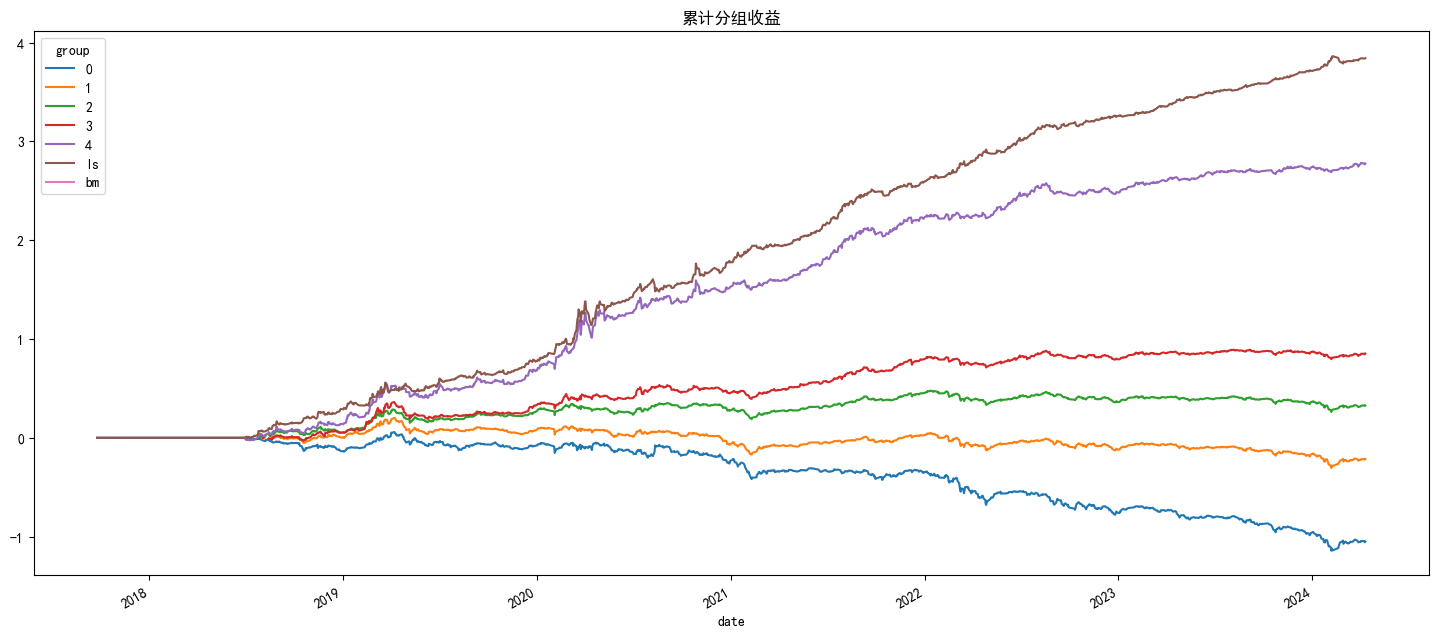

*********************ic分析*****************
        _IC       _IR                                             abs_IC  \
0  0.036869  0.161846  25      0.4000
26      0.4000
27      0.5000
2...   

   significant_ic_ratio  
0              0.928157  


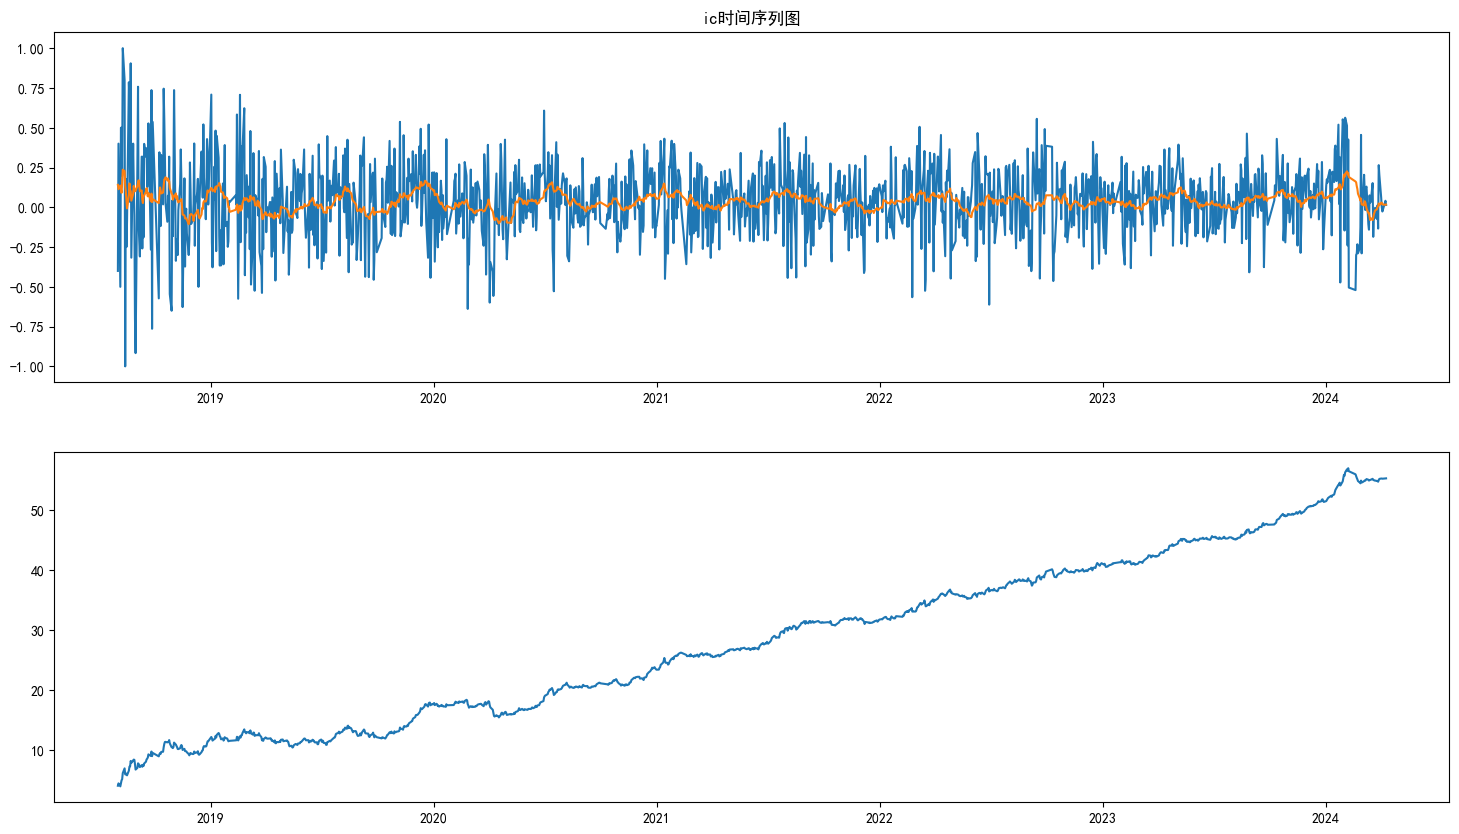

***********因子值最大的标的**************
              date   factor  instrument
134893  2024-04-10  17.1575      113615
210219  2024-04-10  12.1122      128106
99777   2024-04-10  10.9109      123118
28829   2024-04-10  10.0552      123167
2546    2024-04-10   8.6794      123225
***********因子值最小的标的**************
              date  factor  instrument
293641  2024-04-10 -5.5401      123013
1448    2024-04-10 -5.4966      127097
1635    2024-04-10 -5.1712      127096
144239  2024-04-10 -4.0680      127026
289551  2024-04-10 -3.0495      128044


(              date   factor  instrument
 134893  2024-04-10  17.1575      113615
 210219  2024-04-10  12.1122      128106
 99777   2024-04-10  10.9109      123118
 28829   2024-04-10  10.0552      123167
 2546    2024-04-10   8.6794      123225,
               date  factor  instrument
 293641  2024-04-10 -5.5401      123013
 1448    2024-04-10 -5.4966      127097
 1635    2024-04-10 -5.1712      127096
 144239  2024-04-10 -4.0680      127026
 289551  2024-04-10 -3.0495      128044)

In [14]:
models=factor_analysis_frame(params=params,factor_data=factor_data,factor_return=factor_return)
models.render()